<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install seaborn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stats

In [22]:
df = pd.read_csv('./bus-breakdown-and-delays.csv', usecols = ['How_Long_Delayed'])
df.head()

,How_Long_Delayed
0,NaN
1,20MNS
2,15MIN
3,15 MIN
4,NaN


In [23]:
df['numbers'] = df['How_Long_Delayed'].str.extract('(\d+)')
df['IsDelayed'] = df['How_Long_Delayed'].isnull()
df.tail()

,How_Long_Delayed,numbers,IsDelayed
379407,61-90 Min,61,False
379408,16-30 Min,16,False
379409,0-15 Min,0,False
379410,0-15 Min,0,False
379411,0-15 Min,0,False


In [24]:
delays = df[~df['IsDelayed']][['numbers']]
delays.info()
delays['numbers'] = pd.to_numeric(delays['numbers'])
delays.head()

<class 'pandas.core.frame.DataFrame'>
Index: 336274 entries, 1 to 379411
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   numbers  335782 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB


,numbers
1,20.0
2,15.0
3,15.0
5,30.0
6,20.0


# **Central Limit Theorem**
If you take a large number of random samples from any population (regardless of its original distribution), the distribution of the sample means will approach a normal distribution, as the sample size increases.

Sample size = 5
Delays mean = 28.392954357291337
Mean of means: 26.188, Standard error: 173.39653773807595
-------------
Sample size = 15
Delays mean = 28.392954357291337
Mean of means: 26.715619047619047, Standard error: 100.11053773962725
-------------
Sample size = 30
Delays mean = 28.392954357291337
Mean of means: 32.336214285714284, Standard error: 70.78884010392221
-------------
Sample size = 45
Delays mean = 28.392954357291337
Mean of means: 30.0360303030303, Standard error: 57.79884591269198
-------------
Sample size = 75
Delays mean = 28.392954357291337
Mean of means: 27.034537183759102, Standard error: 44.770793529972934
-------------
Sample size = 100
Delays mean = 28.392954357291337
Mean of means: 26.546262626262628, Standard error: 38.77264454454455
-------------


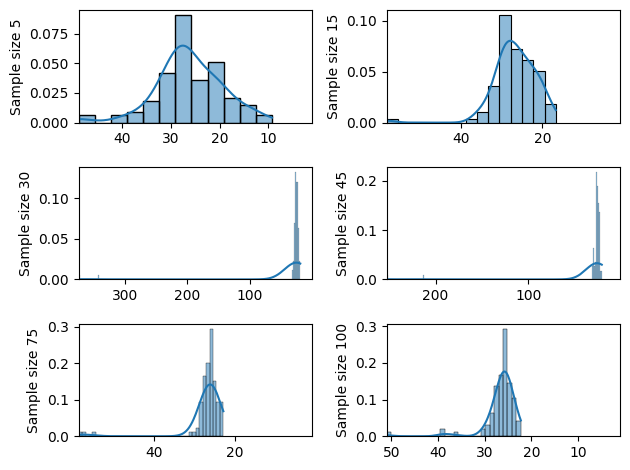

In [45]:
delays_mean = delays['numbers'].mean()
delays_std = delays['numbers'].std()
sample_s = [5, 15, 30, 45, 75, 100]
sample_n = 100
ax = 1


for s in sample_s:
  means = []
  for n in range(sample_n):
    sample = delays.sample(s)
    sample_mean = sample['numbers'].mean()
    means.append(sample_mean)

  print(f'Sample size = {s}')
  print(f'Delays mean = {delays_mean}')
  print(f'Mean of means: {stats.mean(means)}, Standard error: {delays_std/math.sqrt(s)}')
  print('-------------')

  plt.subplot(math.ceil(len(sample_s)/2), 2,ax)
  plt.xlim(max(means))
  plt.ylabel(f'Sample size {s}')
  plt.tight_layout()
  sns.histplot(means, kde = True, stat = 'density')
  ax+=1

In [47]:
sleep = pd.read_csv('./sleep.csv', usecols=['Date', 'Minutes.Asleep', 'Number.of.Awakenings'])
sleep.head(5)

,Date,Minutes.Asleep,Number.of.Awakenings
0,2019-04-01,344,14
1,2019-04-02,273,15
2,2019-04-03,173,7
3,2019-04-03,219,17
4,2019-04-04,356,3


<Axes: title={'center': 'Distribution of sample means: Number of Awakenings'}, ylabel='Awakened'>

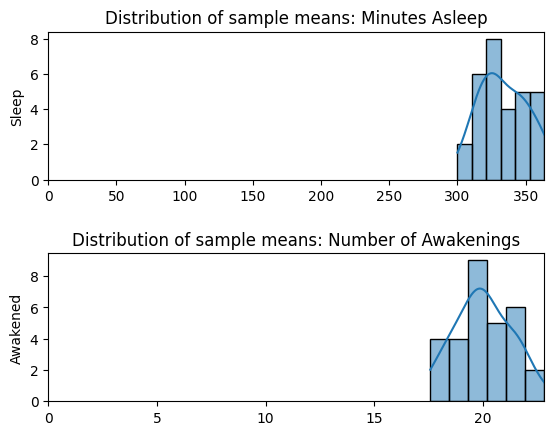

In [73]:
sample_size = 30
sample_number = 30

means_sleep = []
means_awaken = []

sleep_mean = stats.mean(sleep['Minutes.Asleep'])
awaken_mean = stats.mean(sleep['Number.of.Awakenings'])

sleep_std = stats.stdev(sleep['Minutes.Asleep'])
awaken_Std = stats.stdev(sleep['Number.of.Awakenings'])

for i in range(sample_number):
  sample = sleep.sample(sample_size)
  means_sleep.append(sample['Minutes.Asleep'].mean())
  means_awaken.append(sample['Number.of.Awakenings'].mean())

plt.subplot(2, 1, 1)
plt.title('Distribution of sample means: Minutes Asleep')
plt.xlim(0, max(means_sleep))
plt.ylabel('Sleep')
sns.histplot(means_sleep, kde = True)

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 1, 2)
plt.title('Distribution of sample means: Number of Awakenings')
plt.xlim(0, max(means_awaken))
plt.ylabel('Awakened')
sns.histplot(means_awaken, kde = True)
